In [1]:
#Imports
import pandas as pd
import shap
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, RANSACRegressor
from sklearn.model_selection import cross_val_score, KFold, train_test_split, StratifiedKFold, ShuffleSplit, GridSearchCV
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.dates as mdates
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer
import xgboost as xgb
from PIL import Image, ImageOps

In [2]:
df = pd.read_excel("NFL Champion RawData.xlsx")
print(list(df.columns))

['Season', 'Team ID', ' Team ID/Season', 'Team', 'Team/Season', 'Team/Season (sec)', 'sum coach rs games', 'sum coach playoff games', 'FantPt_team_avg', 'FantPt_team_max', 'over600 rec', 'sum gs over600', 'over500 rec', 'over500 mov', '7 <= rec', 'sum wins 20 >=', 'sum mvp share', 'sum dpoy share', 'sum opoy share', 'sum all pro', 'sum cpoy share', 'sum playoff games', 'sum champion', 'sum team L1Y cs', 'sum team L3Y cs', 'sum team L5Y cs', 'sum team L8Y cs', 'sum franchise L1Y cs', 'sum franchise L3Y cs', 'sum franchise L5Y cs', 'sum franchise L8Y cs', 'W', 'L', 'T', 'W-L%', 'PF', 'PA', 'PD', 'MoV', 'SoS', 'SRS', 'OSRS', 'DSRS', 'make playoffs', 'seed', '1 seed', '2 seed', '3 seed', '4 seed', '5 seed', '6 seed', 'champion share', 'pso', 'team_offense_G', 'team_offense_PF', 'team_offense_Tot Yds & TO_Yds', 'team_offense_Tot Yds & TO_Ply', 'team_offense_Tot Yds & TO_Y/P', 'team_offense_Tot Yds & TO_TO', 'team_offense_Tot Yds & TO_FL', 'team_offense_Tot Yds & TO_1stD', 'team_offense_Tot 

In [4]:
data_columns = ['sum coach rs games', 'sum coach playoff games', 'FantPt_team_avg', 'FantPt_team_max', 'over600 rec', 'sum gs over600', 'over500 rec', 'over500 mov', '7 <= rec', 'sum wins 20 >=', 
                'sum mvp share', 'sum dpoy share', 'sum opoy share', 'sum all pro', 'sum cpoy share', 'sum playoff games', 'sum champion', 'sum team L1Y cs', 'sum team L3Y cs', 'sum team L5Y cs', 
                'sum team L8Y cs', 'sum franchise L1Y cs', 'sum franchise L3Y cs', 'sum franchise L5Y cs', 'sum franchise L8Y cs', 'W', 'L', 'T', 'W-L%', 'PF', 'PA', 'PD', 'MoV', 'SoS', 'SRS', 'OSRS',
                'DSRS', 'make playoffs', 'seed', '1 seed', '2 seed', '3 seed', '4 seed', '5 seed', '6 seed', 'pso', 'team_offense_G', 'team_offense_PF', 'team_offense_Tot Yds & TO_Yds', 
                'team_offense_Tot Yds & TO_Ply', 'team_offense_Tot Yds & TO_Y/P', 'team_offense_Tot Yds & TO_TO', 'team_offense_Tot Yds & TO_FL', 'team_offense_Tot Yds & TO_1stD', 'team_offense_Tot Yds & TO_Cmp', 
                'team_offense_Tot Yds & TO_Att', 'team_offense_Passing_Yds', 'team_offense_Passing_TD', 'team_offense_Passing_Int', 'team_offense_Passing_NY/A', 'team_offense_Passing_1stD', 'team_offense_Passing_Att',
                'team_offense_Rushing_Yds', 'team_offense_Rushing_TD', 'team_offense_Rushing_Y/A', 'team_offense_Rushing_1stD', 'team_offense_Penalties_Pen', 'team_offense_Penalties_Yds', 'team_offense_Penalties_1stPy', 
                'team_offense_Sc%', 'team_offense_TO%', 'team_offense_EXP', 'team_defense_G', 'team_defense_PA', 'team_defense_Tot Yds & TO_Yds', 'team_defense_Tot Yds & TO_Ply', 'team_defense_Tot Yds & TO_Y/P', 
                'team_defense_Tot Yds & TO_TO', 'team_defense_Tot Yds & TO_FL', 'team_defense_Tot Yds & TO_1stD', 'team_defense_Tot Yds & TO_Cmp', 'team_defense_Tot Yds & TO_Att', 'team_defense_Passing_Yds', 'team_defense_Passing_TD',
                'team_defense_Passing_Int', 'team_defense_Passing_NY/A', 'team_defense_Passing_1stD', 'team_defense_Passing_Att', 'team_defense_Rushing_Yds', 'team_defense_Rushing_TD', 'team_defense_Rushing_Y/A', 'team_defense_Rushing_1stD',
                'team_defense_Penalties_Pen', 'team_defense_Penalties_Yds', 'team_defense_Penalties_1stPy', 'team_defense_Sc%', 'team_defense_TO%', 'team_defense_EXP', 'passing_offense_G', 'passing_offense_Cmp', 
                'passing_offense_Att', 'passing_offense_Cmp%', 'passing_offense_Yds', 'passing_offense_TD', 'passing_offense_TD%', 'passing_offense_Int', 'passing_offense_Int%', 'passing_offense_Lng',
                'passing_offense_Y/A', 'passing_offense_AY/A', 'passing_offense_Y/C', 'passing_offense_Y/G', 'passing_offense_Rate', 'passing_offense_Sk', 'passing_offense_Yds.1', 'passing_offense_Sk%',
                'passing_offense_NY/A', 'passing_offense_ANY/A', 'passing_offense_4QC', 'passing_offense_GWD', 'passing_offense_EXP']

df= df.dropna(subset=data_columns)
data = df[data_columns].copy()

In [5]:
correlation_matrix = data.corr()

correlation_threshold = .90

columns_to_remove = set()
print("Columns to be Removed:")
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        correlation = correlation_matrix.iloc[i, j]
        if abs(correlation) > correlation_threshold:
            feature_i = correlation_matrix.columns[i]
            feature_j = correlation_matrix.columns[j]
            if feature_i not in columns_to_remove:
                columns_to_remove.add(feature_j)
                print(f"{feature_j} (correlated with {feature_i}): {correlation:.2f}")

data_filtered = data.drop(columns=columns_to_remove)

Columns to be Removed:
sum coach playoff games (correlated with sum coach rs games): 0.90
sum team L5Y cs (correlated with sum playoff games): 0.91
sum team L8Y cs (correlated with sum playoff games): 0.95
sum franchise L1Y cs (correlated with sum team L1Y cs): 0.93
sum team L5Y cs (correlated with sum team L3Y cs): 0.96
sum team L8Y cs (correlated with sum team L3Y cs): 0.93
L (correlated with W): -0.99
W-L% (correlated with W): 1.00
PD (correlated with W): 0.91
MoV (correlated with W): 0.91
OSRS (correlated with PF): 0.92
team_offense_PF (correlated with PF): 1.00
team_defense_PA (correlated with PA): 1.00
team_defense_G (correlated with team_offense_G): 1.00
passing_offense_G (correlated with team_offense_G): 1.00
team_offense_Tot Yds & TO_Y/P (correlated with team_offense_Tot Yds & TO_Yds): 0.91
team_offense_Tot Yds & TO_1stD (correlated with team_offense_Tot Yds & TO_Yds): 0.93
passing_offense_Cmp (correlated with team_offense_Tot Yds & TO_Cmp): 1.00
passing_offense_Att (correlate

In [6]:
print("Columns in data_filtered:")
print(", ".join(f"'{column}'" for column in data_filtered.columns))

print("\nColumns that were removed:")
print(", ".join(f"'{removed_column}'" for removed_column in columns_to_remove))

Columns in data_filtered:
'sum coach rs games', 'FantPt_team_avg', 'FantPt_team_max', 'over600 rec', 'sum gs over600', 'over500 rec', 'over500 mov', '7 <= rec', 'sum wins 20 >=', 'sum mvp share', 'sum dpoy share', 'sum opoy share', 'sum all pro', 'sum cpoy share', 'sum playoff games', 'sum champion', 'sum team L1Y cs', 'sum team L3Y cs', 'sum franchise L3Y cs', 'sum franchise L5Y cs', 'sum franchise L8Y cs', 'W', 'T', 'PF', 'PA', 'SoS', 'SRS', 'DSRS', 'make playoffs', 'seed', '1 seed', '2 seed', '3 seed', '4 seed', '5 seed', '6 seed', 'pso', 'team_offense_G', 'team_offense_Tot Yds & TO_Yds', 'team_offense_Tot Yds & TO_Ply', 'team_offense_Tot Yds & TO_TO', 'team_offense_Tot Yds & TO_FL', 'team_offense_Tot Yds & TO_Cmp', 'team_offense_Tot Yds & TO_Att', 'team_offense_Passing_Yds', 'team_offense_Passing_TD', 'team_offense_Passing_Int', 'team_offense_Passing_NY/A', 'team_offense_Passing_Att', 'team_offense_Rushing_Yds', 'team_offense_Rushing_TD', 'team_offense_Rushing_Y/A', 'team_offense_R

## Feature Selection:
- Identificaiton Columns: 'Season', 'Team ID', ' Team ID/Season', 'Team', 'Team/Season',
- Prediction Column:  'champion share',  
- Additional Features Removed:
- Feature Change Out:

Removed useless and multi-correlated features beings wins, point differential features, and ties.

### The Importance of SRS Explained:
From looking over the most stats in the correlation matrix there were many point differential stats that correlated with each other highly, so many had to be removed.
Choosing SRS was the best fit for the model. SRS is the most advanced PD stat, because it adjust for strength of schedule and when experimenting with the other PD stats,
SRS out performed them. Something to learn from this is that direct correlation (pearson correlation coefficents) are not always the correct answer.

In [10]:
features = ['sum mvp share', 'sum dpoy share', 'sum opoy share', 'sum all pro', 'sum cpoy share', 'sum playoff games',
            'sum champion', 'sum team L1Y cs', 'sum team L3Y cs', 'sum franchise L3Y cs', 'sum franchise L5Y cs', 'sum franchise L8Y cs', 
            'SRS', 'OSRS', 'DSRS', 'SoS', '1 seed', '2 seed', '3 seed',
            '4 seed', '5 seed', '6 seed', 'pso', 'team_offense_G', 'team_offense_Tot Yds & TO_Yds', 
            'team_offense_Tot Yds & TO_Ply', 'team_offense_Tot Yds & TO_TO', 'team_offense_Tot Yds & TO_FL', 'team_offense_Tot Yds & TO_Cmp', 
            'team_offense_Tot Yds & TO_Att', 'team_offense_Passing_Yds', 'team_offense_Passing_TD', 'team_offense_Passing_Int', 
            'team_offense_Passing_Att', 'team_offense_Rushing_Yds', 'team_offense_Rushing_TD', 'team_offense_Rushing_Y/A', 'team_offense_Rushing_1stD', 
            'team_offense_Penalties_Pen', 'team_offense_Penalties_1stPy', 'team_offense_Sc%', 'team_offense_TO%', 'team_defense_Tot Yds & TO_Yds',
            'team_defense_Tot Yds & TO_Ply', 'team_defense_Tot Yds & TO_Y/P', 'team_defense_Tot Yds & TO_TO', 'team_defense_Tot Yds & TO_FL', 'team_defense_Tot Yds & TO_1stD',
            'team_defense_Tot Yds & TO_Cmp', 'team_defense_Tot Yds & TO_Att', 'team_defense_Passing_Yds', 'team_defense_Passing_TD', 'team_defense_Passing_Int', 'team_defense_Passing_Att',
            'team_defense_Rushing_Yds', 'team_defense_Rushing_TD', 'team_defense_Rushing_Y/A', 'team_defense_Rushing_1stD', 'team_defense_Penalties_Pen', 
            'team_defense_Penalties_Yds', 'team_defense_Penalties_1stPy', 'team_defense_Sc%', 'team_defense_TO%', 'team_defense_EXP', 'passing_offense_Cmp%',
            'passing_offense_Lng', 'passing_offense_AY/A', 'passing_offense_Y/C', 'passing_offense_Sk', 'passing_offense_4QC', 'passing_offense_GWD', 'passing_offense_EXP']

num_features = len(features)

print(f"Number of features: {num_features}")

Number of features: 72


In [ ]:
best set - use xgboost - use all data for training (no drop) - xgb = XGBRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=1)

use 300 trees now

Champion AP for Season 2014: 1.0 | Reciprocal: 1.0
Champion AP for Season 2015: 1.0 | Reciprocal: 1.0
Champion AP for Season 2016: 0.25 | Reciprocal: 4.0
Champion AP for Season 2017: 1.0 | Reciprocal: 1.0
Champion AP for Season 2018: 0.5 | Reciprocal: 2.0
Champion AP for Season 2019: 0.25 | Reciprocal: 4.0
Champion AP for Season 2020: 0.5 | Reciprocal: 2.0
Champion AP for Season 2021: 0.2 | Reciprocal: 5.0
Champion AP for Season 2022: 0.25 | Reciprocal: 4.0
Champion AP for Season 2023: 1.0 | Reciprocal: 1.0

features = ['sum mvp share', 'sum dpoy share', 'sum opoy share', 'sum all pro', 'sum cpoy share', 'sum playoff games',
            'sum champion', 'sum team L1Y cs', 'sum team L3Y cs', 'sum franchise L3Y cs', 'sum franchise L5Y cs', 'sum franchise L8Y cs', 
            'SRS', 'OSRS', 'DSRS', 'SoS', '1 seed', '2 seed', '3 seed', 
            '4 seed', '5 seed', '6 seed', 'pso', 'team_offense_G', 'team_offense_Tot Yds & TO_Yds', 
            'team_offense_Tot Yds & TO_Ply', 'team_offense_Tot Yds & TO_TO', 'team_offense_Tot Yds & TO_FL', 'team_offense_Tot Yds & TO_Cmp', 
            'team_offense_Tot Yds & TO_Att', 'team_offense_Passing_Yds', 'team_offense_Passing_TD', 'team_offense_Passing_Int', 
            'team_offense_Passing_Att', 'team_offense_Rushing_Yds', 'team_offense_Rushing_TD', 'team_offense_Rushing_Y/A', 'team_offense_Rushing_1stD', 
            'team_offense_Penalties_Pen', 'team_offense_Penalties_1stPy', 'team_offense_Sc%', 'team_offense_TO%', 'team_defense_Tot Yds & TO_Yds',
            'team_defense_Tot Yds & TO_Ply', 'team_defense_Tot Yds & TO_Y/P', 'team_defense_Tot Yds & TO_TO', 'team_defense_Tot Yds & TO_FL', 'team_defense_Tot Yds & TO_1stD',
            'team_defense_Tot Yds & TO_Cmp', 'team_defense_Tot Yds & TO_Att', 'team_defense_Passing_Yds', 'team_defense_Passing_TD', 'team_defense_Passing_Int', 'team_defense_Passing_Att',
            'team_defense_Rushing_Yds', 'team_defense_Rushing_TD', 'team_defense_Rushing_Y/A', 'team_defense_Rushing_1stD', 'team_defense_Penalties_Pen', 
            'team_defense_Penalties_Yds', 'team_defense_Penalties_1stPy', 'team_defense_Sc%', 'team_defense_TO%', 'team_defense_EXP', 'passing_offense_Cmp%',
            'passing_offense_Lng', 'passing_offense_AY/A', 'passing_offense_Y/C', 'passing_offense_Sk', 'passing_offense_4QC', 'passing_offense_GWD', 'passing_offense_EXP']

num_features = len(features)

print(f"Number of features: {num_features}")


#==========================================================================================================================================================================
use xgboost - use 2005 data up for training - xgb = XGBRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=1)

Champion AP for Season 2014: 0.2 | Reciprocal: 5.0
Champion AP for Season 2015: 0.33 | Reciprocal: 3.0
Champion AP for Season 2016: 0.33 | Reciprocal: 3.0
Champion AP for Season 2017: 1.0 | Reciprocal: 1.0
Champion AP for Season 2018: 0.5 | Reciprocal: 2.0
Champion AP for Season 2019: 0.5 | Reciprocal: 2.0
Champion AP for Season 2020: 1.0 | Reciprocal: 1.0
Champion AP for Season 2021: 0.2 | Reciprocal: 5.0
Champion AP for Season 2022: 0.5 | Reciprocal: 2.0
Champion AP for Season 2023: 0.5 | Reciprocal: 2.0

features = ['sum mvp share', 'sum dpoy share', 'sum opoy share', 'sum all pro', 'sum cpoy share', 'sum playoff games',
            'sum champion', 'sum team L1Y cs', 'sum team L3Y cs', 'sum franchise L3Y cs', 'sum franchise L5Y cs', 'sum franchise L8Y cs', 
            'over500 rec', 'OSRS', 'DSRS', 'SoS', '1 seed', '2 seed', '3 seed', 
            '4 seed', '5 seed', '6 seed', 'pso', 'team_offense_G', 'team_offense_Tot Yds & TO_Yds', 
            'team_offense_Tot Yds & TO_Ply', 'team_offense_Tot Yds & TO_TO', 'team_offense_Tot Yds & TO_FL', 'team_offense_Tot Yds & TO_Cmp', 
            'team_offense_Tot Yds & TO_Att', 'team_offense_Passing_Yds', 'team_offense_Passing_TD', 'team_offense_Passing_Int', 
            'team_offense_Passing_Att', 'team_offense_Rushing_Yds', 'team_offense_Rushing_TD', 'team_offense_Rushing_Y/A', 'team_offense_Rushing_1stD', 
            'team_offense_Penalties_Pen', 'team_offense_Penalties_1stPy', 'team_offense_Sc%', 'team_offense_TO%', 'team_defense_Tot Yds & TO_Yds',
            'team_defense_Tot Yds & TO_Ply', 'team_defense_Tot Yds & TO_Y/P', 'team_defense_Tot Yds & TO_TO', 'team_defense_Tot Yds & TO_FL', 'team_defense_Tot Yds & TO_1stD',
            'team_defense_Tot Yds & TO_Cmp', 'team_defense_Tot Yds & TO_Att', 'team_defense_Passing_Yds', 'team_defense_Passing_TD', 'team_defense_Passing_Int', 'team_defense_Passing_Att',
            'team_defense_Rushing_Yds', 'team_defense_Rushing_TD', 'team_defense_Rushing_Y/A', 'team_defense_Rushing_1stD', 'team_defense_Penalties_Pen', 
            'team_defense_Penalties_Yds', 'team_defense_Penalties_1stPy', 'team_defense_Sc%', 'team_defense_TO%', 'team_defense_EXP', 'passing_offense_Cmp%',
            'passing_offense_Lng', 'passing_offense_AY/A', 'passing_offense_Y/C', 'passing_offense_Sk', 'passing_offense_4QC', 'passing_offense_GWD', 'passing_offense_EXP']

num_features = len(features)

print(f"Number of features: {num_features}")

In [120]:
(1+1+4+1+2+4+2+5+4+1)/10

2.5

In [121]:
(5+3+3+1+2+2+1+5+2+2)/10

2.6

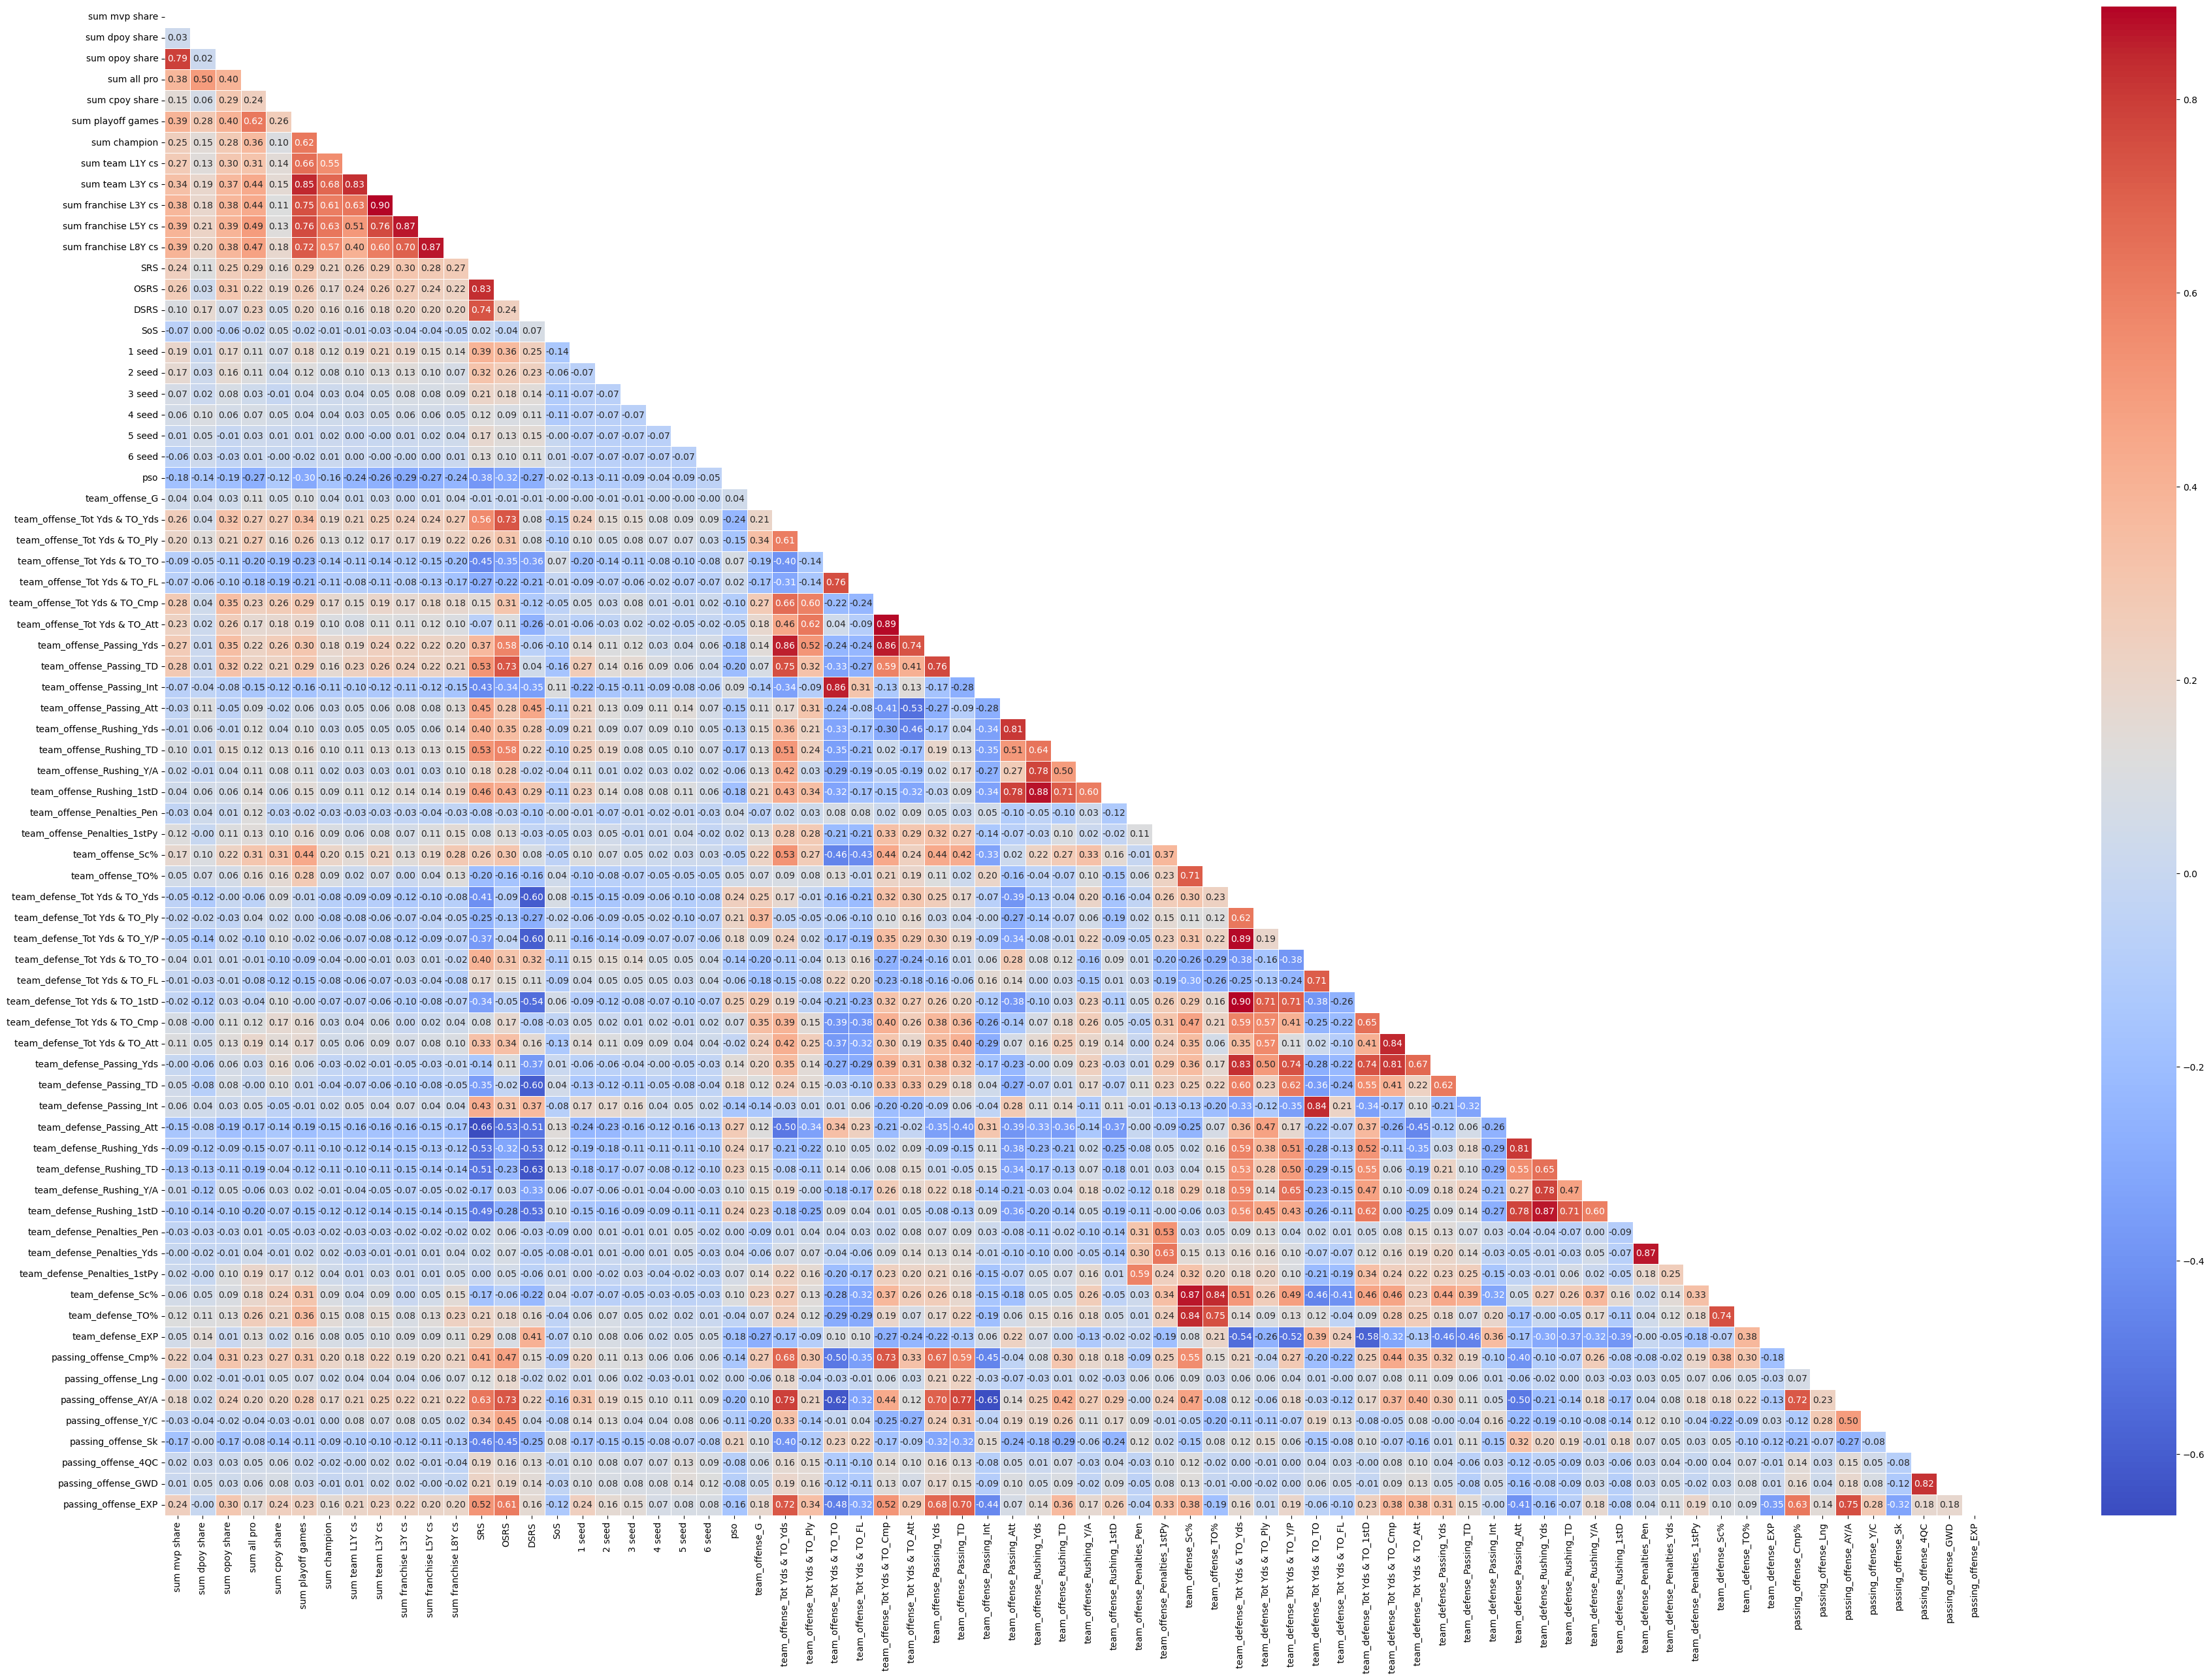

In [8]:
selected_features_data = data[features]
correlation_matrix = selected_features_data.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(45, 30))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5, mask=mask)
plt.show()

In [30]:
#dropping data before 2000. Several features (sum) take past x years. 

df.drop(df[df['Season'] < 2000].index, inplace = True)
df = pd.read_excel("NFL Champion RawData.xlsx")

In [25]:
train = df[df["Season"] < 2024].copy()
test = df[df["Season"] == 2024].copy()

sc = MinMaxScaler()
sc.fit(train[features])
train[features]=sc.transform(train[features])
test[features]=sc.transform(test[features])

#model parameters
rf = RandomForestRegressor(n_estimators=100, random_state=10, min_samples_split=5, max_depth=5)
rf.fit(train[features], train["champion share"])

#predicting
predictions = rf.predict(test[features]) 
predictions = pd.DataFrame(predictions, columns=["predicted champion share"], index=test.index)
frame = df[df["make playoffs"] == 1]
frame = pd.concat([test[["Season", "Team", "champion share"]], predictions], axis=1)
frame.sort_values(["Season", "predicted champion share"], inplace=True, ascending = [False, False])

#error metrics
mae1 = mean_absolute_error(frame["champion share"], frame["predicted champion share"])
mse1 = mean_squared_error(frame["champion share"], frame["predicted champion share"])
rmse1 = mean_squared_error(frame["champion share"], frame["predicted champion share"], squared=False)


print("Error Metrics: ")
print("=============================================================================\n")
print("PT MAE: ", mae1)
print("PT MSE: ", mse1)
print("PT RMSE: ", rmse1)
print("-----------------------------------------------------------------------------\n")


#feature importance
f_list = list(features)
f_importance = pd.Series(rf.feature_importances_, index = f_list).sort_values(ascending = False)
print("Feature Importance: ")
print("=============================================================================\n")
print(f_importance.head(20))
print("-----------------------------------------------------------------------------\n")


# Filter to include only playoff teams
frame_playoff = test[test["make playoffs"] == 1]

# Predicting
predictions = rf.predict(frame_playoff[features])
predictions = pd.DataFrame(predictions, columns=["predicted champion share"], index=frame_playoff.index)

# Concatenate predictions to the playoff DataFrame
frame_playoff = pd.concat([frame_playoff[["Season", "Team", "champion share"]], predictions], axis=1)

# Sort the DataFrame for playoff teams based on predicted champion share
frame_playoff.sort_values(["Season", "predicted champion share"], inplace=True, ascending=[False, False])

# Print Full Results for Playoff Teams
print("Full Results (Playoff Teams Only):")
print("=============================================================================\n")
print(frame_playoff.head(10))

Error Metrics: 

PT MAE:  0.08660337000129124
PT MSE:  0.027279184566810465
PT RMSE:  0.16516411404058226
-----------------------------------------------------------------------------

Feature Importance: 

SRS                              0.443103
2 seed                           0.127822
1 seed                           0.119686
4 seed                           0.033290
passing_offense_EXP              0.016809
3 seed                           0.013705
DSRS                             0.013058
team_offense_Passing_Yds         0.012546
OSRS                             0.010585
pso                              0.009328
team_defense_EXP                 0.008950
passing_offense_Y/C              0.007262
sum franchise L3Y cs             0.006841
team_defense_Tot Yds & TO_Yds    0.006684
sum team L1Y cs                  0.006385
team_offense_Sc%                 0.005863
passing_offense_Lng              0.005800
team_defense_Penalties_Yds       0.005630
team_defense_Rushing_Y/A         0.00

In [26]:
actual = frame_playoff.sort_values("champion share", ascending=False)
predicted = frame_playoff.sort_values("predicted champion share", ascending=False)
actual["Rank"] = list(range(1, actual.shape[0]+1))
predicted["Predicted Rank"] = list(range(1, predicted.shape[0]+1))

ranking_results = actual.merge(predicted, on="Team").head(1) #HEAD
print("Ranking Accuracy (Champion):")
print("=============================================================================\n")
print(ranking_results.to_string())

def find_ap(frame_playoff):
    actual = frame_playoff.sort_values("champion share", ascending=False).head(1) #HEAD

    predicted = frame_playoff.sort_values("predicted champion share", ascending=False)
    ps = []
    found = 0
    seen = 1
    for index, row in predicted.iterrows():
        if row["Team"] in actual["Team"].values:
            found += 1
            ps.append(found / seen)
        seen += 1
    return sum(ps) / len(ps)

ap = find_ap(frame_playoff)
print("=============================================================================\n")
print("PT AP Champion: ", ap)

Ranking Accuracy (Champion):

   Season_x                 Team  champion share_x  predicted champion share_x  Rank  Season_y  champion share_y  predicted champion share_y  Predicted Rank
0      2024  San Francisco 49ers              0.25                    0.678696     1      2024              0.25                    0.678696               1

PT AP Champion:  1.0


In [27]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


all_predictions = []
aps = []

backtest_seasons = [2014,2015,2016,2017,2018,2019,2020,2021,2022,2023]
combined_predictions = pd.DataFrame(columns=['predicted champion share', 'champion share', 'Team', 'Season', 'Team/Season', 'make playoffs'])

for season in backtest_seasons:
    train = df[df["Season"] < season].copy()
    test = df[df["Season"] == season].copy()

    sc = MinMaxScaler()
    sc.fit(train[features])
    train[features] = sc.transform(train[features])
    test[features] = sc.transform(test[features])

    rf.fit(train[features], train['champion share'])
    predictions = rf.predict(test[features])
    predictions_df = pd.DataFrame(predictions, columns=["predicted champion share"], index=test.index)
    frame_playoff = pd.concat([test[["Team", "champion share", "Season", "make playoffs"]], predictions_df], axis=1)

    # Save predictions for the current season to the combined DataFrame
    frame_playoff['Team/Season'] = frame_playoff['Team'] + ' ' + frame_playoff['Season'].astype(str)
    combined_predictions = pd.concat([combined_predictions, frame_playoff], ignore_index=True)

    all_predictions.append(frame_playoff)
    ap = find_ap(frame_playoff)
    aps.append(ap)

    reciprocal_ap = 1 / ap
    print(f"Champion AP for Season {season}: {round(ap, 2)} | Reciprocal: {round(reciprocal_ap, 2)}")

    aps.append(ap)

for idx, predictions in enumerate(all_predictions):
    season = backtest_seasons[idx]
    top5_predictions = predictions.sort_values("predicted champion share", ascending=False).head(5)
    
    print(f"\nTop 5 Predicted Teams for Season {season}:")
    print(top5_predictions[["Team", "predicted champion share", "champion share"]])

average_mae = np.mean([mean_absolute_error(fp["champion share"], fp["predicted champion share"]) for fp in all_predictions])
average_mse = np.mean([mean_squared_error(fp["champion share"], fp["predicted champion share"]) for fp in all_predictions])
average_rmse = np.mean([mean_squared_error(fp["champion share"], fp["predicted champion share"], squared=False) for fp in all_predictions])
average_ap = np.mean(aps)

last_n_seasons_aps = aps[-10:]
min_ap = np.min(last_n_seasons_aps)
max_ap = np.max(last_n_seasons_aps)

reciprocal_average_ap = 1.0 / average_ap
reciprocal_min_ap = 1.0 / min_ap
reciprocal_max_ap = 1.0 / max_ap

print("\nAverage Error Metrics Across All Seasons:")
print("=============================================================================")
print(f"BT Average Champion AP: {round(average_ap, 2)} | Reciprocal: {round(reciprocal_average_ap, 2)}")
print(f"BT Max Champion AP: {round(min_ap, 2)} | Reciprocal: {round(reciprocal_min_ap, 2)}")
print(f"BT Min Champion AP: {round(max_ap, 2)} | Reciprocal: {round(reciprocal_max_ap, 2)}")
print("=============================================================================")

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.


Champion AP for Season 2014: 1.0 | Reciprocal: 1.0
Champion AP for Season 2015: 0.5 | Reciprocal: 2.0
Champion AP for Season 2016: 1.0 | Reciprocal: 1.0
Champion AP for Season 2017: 1.0 | Reciprocal: 1.0
Champion AP for Season 2018: 0.33 | Reciprocal: 3.0
Champion AP for Season 2019: 0.25 | Reciprocal: 4.0
Champion AP for Season 2020: 0.33 | Reciprocal: 3.0
Champion AP for Season 2021: 0.17 | Reciprocal: 6.0
Champion AP for Season 2022: 0.11 | Reciprocal: 9.0
Champion AP for Season 2023: 1.0 | Reciprocal: 1.0

Top 5 Predicted Teams for Season 2014:
                     Team  predicted champion share  champion share
320      Seattle Seahawks                  0.681199            1.00
321        Denver Broncos                  0.556558            0.75
324     Carolina Panthers                  0.515767            0.25
323   San Francisco 49ers                  0.510118            0.50
322  New England Patriots                  0.476314            0.50

Top 5 Predicted Teams for Season 201

In [24]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import ParameterGrid
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, average_precision_score

target_variable = 'champion share'

train = df[df["Season"] <= 2022].copy()
test = df[df["Season"] > 2022].copy()

sc = MinMaxScaler()
sc.fit(train[features])
train[features] = sc.transform(train[features])
test[features] = sc.transform(test[features])

models = {
    'RandomForest': {
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': [5, 10, 15, 100],
            'max_depth': [None, 5, 10, 15],
            'min_samples_split': [2, 5, 10],
            'random_state': [1, 5, 10, 15]
        }
    },
    'XGBoost': {
        'model': XGBRegressor(),
        'params': {
            'n_estimators': [5, 10, 15, 100],
            'max_depth': [3, 5, 7, 9],
            'learning_rate': [0.01, 0.1],
            'random_state': [1, 5, 10, 15]
        }
    },
    'NeuralNetwork': {
        'model': MLPRegressor(),
        'params': {
            'hidden_layer_sizes': [(64, 32), (32, 16)],
            'activation': ['relu'],
            'solver': ['adam'],
            'batch_size': [16, 32, 64],
            'learning_rate_init': [0.001, 0.01],
            'random_state': [1, 5, 10, 15]
        }
    }
}

from tqdm import tqdm
results = {}
for model_name, model_info in models.items():
    param_grid = ParameterGrid(model_info['params'])
    best_mae = np.inf
    best_params = None  

    for params in tqdm(param_grid, desc=f"Grid search for {model_name}", position=0, leave=True):
        if model_name == 'NeuralNetwork':
            model = MLPRegressor()
            model.set_params(**params)
            model.fit(train[features], train[target_variable])
            predictions = model.predict(test[features])
        else:
            model = model_info['model'].set_params(**params)
            model.fit(train[features], train[target_variable])
            predictions = model.predict(test[features])

        mae = mean_absolute_error(test[target_variable], predictions)

        if mae < best_mae:
            best_mae = mae
            best_params = params  

    if model_name == 'NeuralNetwork':
        final_model = MLPRegressor()
        final_model.set_params(**best_params)
        final_model.fit(train[features], train[target_variable])
    else:
        final_model = model_info['model'].set_params(**best_params)
        final_model.fit(train[features], train[target_variable])

    test['predicted champion share'] = final_model.predict(test[features])

    ap = find_ap(test)
    
    print("=============================================================================\n")
    print(f"Model: {model_name}")
    print(f"PT AP Top 4: {ap}")
    print(f"MAE: {best_mae}")
    print(f"Best Parameters: {best_params}")
    print("-----------------------------------------------------------------------------\n")

    results[model_name] = {
        'MAE': best_mae,
        'Best_Params': best_params,
        'Average_Precision_Top_4': ap
    }

    completion_percentage = (len(results) / len(models)) * 100
    print(f"Model {model_name} completed. {completion_percentage:.2f}% done.")

print("Grid search and evaluation completed.")

Grid search for RandomForest: 100%|██████████| 192/192 [02:36<00:00,  1.23it/s]



Model: RandomForest
PT AP Top 4: 0.5588235294117647
MAE: 0.0792132615318566
Best Parameters: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 100, 'random_state': 10}
-----------------------------------------------------------------------------

Model RandomForest completed. 33.33% done.


Grid search for XGBoost: 100%|██████████| 128/128 [00:06<00:00, 21.18it/s]



Model: XGBoost
PT AP Top 4: 0.5588235294117647
MAE: 0.0851497914045467
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'random_state': 1}
-----------------------------------------------------------------------------

Model XGBoost completed. 66.67% done.


Grid search for NeuralNetwork: 100%|██████████| 48/48 [00:32<00:00,  1.49it/s]



Model: NeuralNetwork
PT AP Top 4: 0.17142857142857143
MAE: 0.07814600450597095
Best Parameters: {'activation': 'relu', 'batch_size': 16, 'hidden_layer_sizes': (64, 32), 'learning_rate_init': 0.01, 'random_state': 10, 'solver': 'adam'}
-----------------------------------------------------------------------------

Model NeuralNetwork completed. 100.00% done.
Grid search and evaluation completed.


## Old Past Test Model:

In [9]:
#RandomForest Regressor
#PastApproach
#dropping data before 2000. Several features (sum) take past x years. 

#df.drop(df[df['Season'] < 2005].index, inplace = True)

#no data dropping 5/10 champs correct
df = pd.read_excel("NFL Champion RawData.xlsx")



features = ['SRS','1 seed', '2 seed', '3 seed', '4 seed', '5 seed', '6 seed','sum mvp share', 'sum dpoy share', 
            'sum opoy share', 'sum all pro', 'sum cpoy share', 'sum playoff games', 'sum champion', 'sum franchise L1Y cs', 'sum franchise L3Y cs',
            'sum franchise L5Y cs', 'sum franchise L8Y cs','PF', 'PA', 'SoS', 'OSRS', 'DSRS',   'pso', 'team_offense_G',
            'team_offense_PF', 'team_offense_Tot Yds & TO_Yds', 'team_offense_Tot Yds & TO_Ply', 'team_offense_Tot Yds & TO_Y/P', 
            'team_offense_Tot Yds & TO_TO', 'team_offense_Tot Yds & TO_FL', 'team_offense_Tot Yds & TO_1stD', 'team_offense_Tot Yds & TO_Cmp',
            'team_offense_Tot Yds & TO_Att', 'team_offense_Passing_Yds', 'team_offense_Passing_TD', 'team_offense_Passing_Int', 'team_offense_Passing_NY/A', 
            'team_offense_Passing_1stD', 'team_offense_Passing_Att', 'team_offense_Rushing_Yds', 'team_offense_Rushing_TD', 'team_offense_Rushing_Y/A', 
            'team_offense_Rushing_1stD', 'team_offense_Penalties_Pen', 'team_offense_Penalties_Yds', 'team_offense_Penalties_1stPy', 'team_offense_Sc%', 
            'team_offense_TO%', 'team_offense_EXP', 'team_defense_G', 'team_defense_PA', 'team_defense_Tot Yds & TO_Yds', 'team_defense_Tot Yds & TO_Ply', 
            'team_defense_Tot Yds & TO_Y/P', 'team_defense_Tot Yds & TO_TO', 'team_defense_Tot Yds & TO_FL', 'team_defense_Tot Yds & TO_1stD', 
            'team_defense_Tot Yds & TO_Cmp', 'team_defense_Tot Yds & TO_Att', 'team_defense_Passing_Yds', 'team_defense_Passing_TD', 
            'team_defense_Passing_Int', 'team_defense_Passing_NY/A', 'team_defense_Passing_1stD', 'team_defense_Passing_Att', 'team_defense_Rushing_Yds', 
            'team_defense_Rushing_TD', 'team_defense_Rushing_Y/A', 'team_defense_Rushing_1stD', 'team_defense_Penalties_Pen', 'team_defense_Penalties_Yds', 
            'team_defense_Penalties_1stPy', 'team_defense_Sc%', 'team_defense_TO%', 'team_defense_EXP']

train = df[df["Season"] < 2013].copy()
test = df[df["Season"] > 2013].copy()

sc = MinMaxScaler()
sc.fit(train[features])
train[features]=sc.transform(train[features])
test[features]=sc.transform(test[features])

rf = RandomForestRegressor(n_estimators=500, random_state=50, min_samples_split=2, max_depth=5)
rf.fit(train[features], train["champion share"])

predictions = rf.predict(test[features])
predictions = pd.DataFrame(predictions, columns=["predicted champion share"], index=test.index)
frame = pd.concat([test[["Season", "Team", "champion share"]], predictions], axis=1)
frame.sort_values(["Season", "predicted champion share"], inplace=True, ascending = [False, False])

from sklearn.metrics import average_precision_score 
print("Top 5 Predicted Teams with Average Precision Score:")
print("=============================================================================\n")

average_precision_scores = []

for season in frame["Season"].unique():
    season_frame = frame[frame["Season"] == season]
    

    print(f"Season {season}:")
    print(season_frame.head(5)[["Team", "champion share", "predicted champion share"]])

    y_true = season_frame["champion share"] == 1.0
    y_scores = season_frame["predicted champion share"]
    
    average_precision = average_precision_score(y_true, y_scores)
    average_precision_scores.append(average_precision)
    
    print(f"Average Precision: {average_precision:.4f}")
    print("-----------------------------------------------------------------------------\n")


overall_average_precision = np.mean(average_precision_scores)
print(f"Overall Average Precision: {overall_average_precision:.4f}")


mae = mean_absolute_error(frame["champion share"], frame["predicted champion share"])
mse = mean_squared_error(frame["champion share"], frame["predicted champion share"])
rmse = mean_squared_error(frame["champion share"], frame["predicted champion share"], squared=False)
print("Error Metrics:")
print("=============================================================================\n")
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)
print("-----------------------------------------------------------------------------\n")

f_list = list(features)
f_importance = pd.Series(rf.feature_importances_, index=f_list).sort_values(ascending=False)
print("Feature Importance:")
print("=============================================================================\n")
print(f_importance.head(10))
print("-----------------------------------------------------------------------------\n")

Top 5 Predicted Teams with Average Precision Score:

Season 2024:
                   Team  champion share  predicted champion share
3   San Francisco 49ers            0.25                  0.596589
0      Baltimore Ravens            0.25                  0.532656
1        Dallas Cowboys            0.00                  0.513739
4         Buffalo Bills            0.00                  0.500891
10       Houston Texans            0.00                  0.170962
Average Precision: -0.0000
-----------------------------------------------------------------------------

Season 2023:
                    Team  champion share  predicted champion share
32    Kansas City Chiefs            1.00                  0.587571
34         Buffalo Bills            0.25                  0.522149
33   Philadelphia Eagles            0.75                  0.512948
35   San Francisco 49ers            0.50                  0.500930
42  Jacksonville Jaguars            0.25                  0.354903
Average Precision

No positive class found in y_true, recall is set to one for all thresholds.


## XGBoost Model:

In [11]:
from xgboost import XGBRegressor
df = pd.read_excel("NFL Champion RawData.xlsx")


train = df[df["Season"] < 2024].copy()
test = df[df["Season"] == 2024].copy()

sc = MinMaxScaler()
sc.fit(train[features])
train[features]=sc.transform(train[features])
test[features]=sc.transform(test[features])

xgb = XGBRegressor(n_estimators=300, max_depth=3, learning_rate=0.1, random_state=1)
xgb.fit(train[features], train["champion share"])

predictions = xgb.predict(test[features]) 
predictions = pd.DataFrame(predictions, columns=["predicted champion share"], index=test.index)
frame = df[df["make playoffs"] == 1]
frame = pd.concat([test[["Season", "Team", "champion share"]], predictions], axis=1)
frame.sort_values(["Season", "predicted champion share"], inplace=True, ascending = [False, False])

mae1 = mean_absolute_error(frame["champion share"], frame["predicted champion share"])
mse1 = mean_squared_error(frame["champion share"], frame["predicted champion share"])
rmse1 = mean_squared_error(frame["champion share"], frame["predicted champion share"], squared=False)


print("Error Metrics: ")
print("=============================================================================\n")
print("PT MAE: ", mae1)
print("PT MSE: ", mse1)
print("PT RMSE: ", rmse1)
print("-----------------------------------------------------------------------------\n")


f_list = list(features)
f_importance = pd.Series(xgb.feature_importances_, index = f_list).sort_values(ascending = False)
print("Feature Importance: ")
print("=============================================================================\n")
print(f_importance.head(20))
print("-----------------------------------------------------------------------------\n")


frame_playoff = test[test["make playoffs"] == 1]

predictions = xgb.predict(frame_playoff[features])
predictions = pd.DataFrame(predictions, columns=["predicted champion share"], index=frame_playoff.index)

frame_playoff = pd.concat([frame_playoff[["Season", "Team", "champion share"]], predictions], axis=1)

frame_playoff.sort_values(["Season", "predicted champion share"], inplace=True, ascending=[False, False])

print("Full Results (Playoff Teams Only):")
print("=============================================================================\n")
print(frame_playoff.to_string())

Error Metrics: 

PT MAE:  0.09064862233935855
PT MSE:  0.02683725848582668
PT RMSE:  0.16382081212662414
-----------------------------------------------------------------------------

Feature Importance: 

SRS                         0.135179
1 seed                      0.120183
2 seed                      0.084317
sum franchise L3Y cs        0.045873
team_defense_Sc%            0.034722
team_offense_Rushing_Y/A    0.029842
passing_offense_EXP         0.029200
team_defense_Rushing_Y/A    0.025731
4 seed                      0.023718
team_defense_Passing_TD     0.021922
passing_offense_AY/A        0.019989
team_offense_Passing_Att    0.016361
pso                         0.016050
passing_offense_Lng         0.015628
3 seed                      0.014343
DSRS                        0.012915
OSRS                        0.012774
sum team L3Y cs             0.012680
sum team L1Y cs             0.012196
team_defense_EXP            0.011702
dtype: float32
---------------------------------------

### XGBoost Top 4 Teams Evaluation:

In [12]:
actual = frame_playoff.sort_values("champion share", ascending=False)
predicted = frame_playoff.sort_values("predicted champion share", ascending=False)
actual["Rank"] = list(range(1, actual.shape[0]+1))
predicted["Predicted Rank"] = list(range(1, predicted.shape[0]+1))

ranking_results = actual.merge(predicted, on="Team").head(4)
print("Ranking Accuracy (Top 4):")
print("=============================================================================\n")
print(ranking_results.to_string())

def find_ap(frame_playoff):
    actual = frame_playoff.sort_values("champion share", ascending=False).head(4)

    predicted = frame_playoff.sort_values("predicted champion share", ascending=False)
    ps = []
    found = 0
    seen = 1
    for index, row in predicted.iterrows():
        if row["Team"] in actual["Team"].values:
            found += 1
            ps.append(found / seen)
        seen += 1
    return sum(ps) / len(ps)

ap = find_ap(frame_playoff)
print("=============================================================================\n")
print("PT AP Top 4: ", ap)

Ranking Accuracy (Top 4):

   Season_x                 Team  champion share_x  predicted champion share_x  Rank  Season_y  champion share_y  predicted champion share_y  Predicted Rank
0      2024  San Francisco 49ers              0.25                    0.776630     1      2024              0.25                    0.776630               1
1      2024     Baltimore Ravens              0.25                    0.501278     2      2024              0.25                    0.501278               2
2      2024       Dallas Cowboys              0.00                    0.478068     3      2024              0.00                    0.478068               3
3      2024        Buffalo Bills              0.00                    0.379120     4      2024              0.00                    0.379120               4

PT AP Top 4:  1.0


In [13]:
all_predictions = []
aps = []

for season in range(1991, 2024):
    if season >= 2014:  # Skip seasons before 2014
        train = df[df["Season"] < season].copy()
        test = df[df["Season"] == season].copy()

        sc = MinMaxScaler()
        sc.fit(train[features])
        train[features] = sc.transform(train[features])
        test[features] = sc.transform(test[features])

        xgb.fit(train[features], train['champion share'])
        predictions = xgb.predict(test[features])
        predictions = pd.DataFrame(predictions, columns=["predicted champion share"], index=test.index)
        frame_playoff = pd.concat([test[["Team", "champion share"]], predictions], axis=1)
        all_predictions.append(frame_playoff)
        ap = find_ap(frame_playoff)
        aps.append(ap)
        print(f"AP for Season {season}: {ap}")

average_mae = np.mean([mean_absolute_error(fp["champion share"], fp["predicted champion share"]) for fp in all_predictions])
average_mse = np.mean([mean_squared_error(fp["champion share"], fp["predicted champion share"]) for fp in all_predictions])
average_rmse = np.mean([mean_squared_error(fp["champion share"], fp["predicted champion share"], squared=False) for fp in all_predictions])
average_ap = np.mean(aps)

print("\nAverage Error Metrics Across All Seasons:")
print("=============================================================================")
print(f"Average MAE: {average_mae}")
print(f"Average MSE: {average_mse}")
print(f"Average RMSE: {average_rmse}")
print(f"Average AP: {average_ap}")
print("=============================================================================")

AP for Season 2014: 0.7333333333333333
AP for Season 2015: 0.8541666666666666
AP for Season 2016: 0.95
AP for Season 2017: 0.7928571428571429
AP for Season 2018: 0.7708333333333333
AP for Season 2019: 1.0
AP for Season 2020: 0.638095238095238
AP for Season 2021: 0.95
AP for Season 2022: 0.46825396825396826
AP for Season 2023: 0.7986111111111112

Average Error Metrics Across All Seasons:
Average MAE: 0.08771581638907264
Average MSE: 0.023032396096761155
Average RMSE: 0.15024947110897996
Average AP: 0.7956150793650794


### XGBoost Champion Evaluation:

In [14]:
actual = frame_playoff.sort_values("champion share", ascending=False)
predicted = frame_playoff.sort_values("predicted champion share", ascending=False)
actual["Rank"] = list(range(1, actual.shape[0]+1))
predicted["Predicted Rank"] = list(range(1, predicted.shape[0]+1))

ranking_results = actual.merge(predicted, on="Team").head(1) #HEAD
print("Ranking Accuracy (Champion):")
print("=============================================================================\n")
print(ranking_results.to_string())

def find_ap(frame_playoff):
    actual = frame_playoff.sort_values("champion share", ascending=False).head(1) #HEAD

    predicted = frame_playoff.sort_values("predicted champion share", ascending=False)
    ps = []
    found = 0
    seen = 1
    for index, row in predicted.iterrows():
        if row["Team"] in actual["Team"].values:
            found += 1
            ps.append(found / seen)
        seen += 1
    return sum(ps) / len(ps)

ap = find_ap(frame_playoff)
print("=============================================================================\n")
print("PT AP Champion: ", ap)

Ranking Accuracy (Champion):

                 Team  champion share_x  predicted champion share_x  Rank  champion share_y  predicted champion share_y  Predicted Rank
0  Kansas City Chiefs               1.0                    0.710454     1               1.0                    0.710454               1

PT AP Champion:  1.0


In [15]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


all_predictions = []
aps = []

backtest_seasons = [2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024]
#backtest_seasons = [2024]
combined_predictions = pd.DataFrame(columns=['predicted champion share', 'champion share', 'Team', 'Season', 'Team/Season', 'make playoffs'])

for season in backtest_seasons:
    train = df[df["Season"] < season].copy()
    test = df[df["Season"] == season].copy()

    sc = MinMaxScaler()
    sc.fit(train[features])
    train[features] = sc.transform(train[features])
    test[features] = sc.transform(test[features])

    xgb.fit(train[features], train['champion share'])
    predictions = xgb.predict(test[features])
    predictions_df = pd.DataFrame(predictions, columns=["predicted champion share"], index=test.index)
    frame_playoff = pd.concat([test[["Team", "champion share", "Season", "make playoffs"]], predictions_df], axis=1)

    frame_playoff['Team/Season'] = frame_playoff['Team'] + ' ' + frame_playoff['Season'].astype(str)
    combined_predictions = pd.concat([combined_predictions, frame_playoff], ignore_index=True)

    all_predictions.append(frame_playoff)
    ap = find_ap(frame_playoff)
    aps.append(ap)

    reciprocal_ap = 1 / ap
    print(f"Champion AP for Season {season}: {round(ap, 2)} | Reciprocal: {round(reciprocal_ap, 2)}")

    aps.append(ap)

for idx, predictions in enumerate(all_predictions):
    season = backtest_seasons[idx]
    top5_predictions = predictions.sort_values("predicted champion share", ascending=False).head(5)
    
    print(f"\nTop 5 Predicted Teams for Season {season}:")
    print(top5_predictions[["Team", "predicted champion share", "champion share"]])

average_mae = np.mean([mean_absolute_error(fp["champion share"], fp["predicted champion share"]) for fp in all_predictions])
average_mse = np.mean([mean_squared_error(fp["champion share"], fp["predicted champion share"]) for fp in all_predictions])
average_rmse = np.mean([mean_squared_error(fp["champion share"], fp["predicted champion share"], squared=False) for fp in all_predictions])
average_ap = np.mean(aps)

last_n_seasons_aps = aps[-10:]
min_ap = np.min(last_n_seasons_aps)
max_ap = np.max(last_n_seasons_aps)

reciprocal_average_ap = 1.0 / average_ap
reciprocal_min_ap = 1.0 / min_ap
reciprocal_max_ap = 1.0 / max_ap

print("\nAverage Error Metrics Across All Seasons:")
print("=============================================================================")
print(f"BT Average Champion AP: {round(average_ap, 2)} | Reciprocal: {round(reciprocal_average_ap, 2)}")
print(f"BT Max Champion AP: {round(min_ap, 2)} | Reciprocal: {round(reciprocal_min_ap, 2)}")
print(f"BT Min Champion AP: {round(max_ap, 2)} | Reciprocal: {round(reciprocal_max_ap, 2)}")
print("=============================================================================")

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.


Champion AP for Season 2014: 1.0 | Reciprocal: 1.0
Champion AP for Season 2015: 0.5 | Reciprocal: 2.0
Champion AP for Season 2016: 0.5 | Reciprocal: 2.0
Champion AP for Season 2017: 1.0 | Reciprocal: 1.0
Champion AP for Season 2018: 0.33 | Reciprocal: 3.0
Champion AP for Season 2019: 0.25 | Reciprocal: 4.0
Champion AP for Season 2020: 1.0 | Reciprocal: 1.0
Champion AP for Season 2021: 0.2 | Reciprocal: 5.0
Champion AP for Season 2022: 0.25 | Reciprocal: 4.0
Champion AP for Season 2023: 1.0 | Reciprocal: 1.0
Champion AP for Season 2024: 0.5 | Reciprocal: 2.0

Top 5 Predicted Teams for Season 2014:
                    Team  predicted champion share  champion share
320     Seattle Seahawks                  0.721693            1.00
324    Carolina Panthers                  0.681265            0.25
321       Denver Broncos                  0.525190            0.75
332    Green Bay Packers                  0.415019            0.00
323  San Francisco 49ers                  0.408768           

## RandomForest Model:

In [11]:
train = df[df["Season"] < 2024].copy()
test = df[df["Season"] == 2024].copy()

sc = MinMaxScaler()
sc.fit(train[features])
train[features]=sc.transform(train[features])
test[features]=sc.transform(test[features])

rf = RandomForestRegressor(n_estimators=100, random_state=5, min_samples_split=5, max_depth=5)
rf.fit(train[features], train["champion share"])

predictions = rf.predict(test[features]) 
predictions = pd.DataFrame(predictions, columns=["predicted champion share"], index=test.index)
frame = df[df["make playoffs"] == 1]
frame = pd.concat([test[["Season", "Team", "champion share"]], predictions], axis=1)
frame.sort_values(["Season", "predicted champion share"], inplace=True, ascending = [False, False])

mae1 = mean_absolute_error(frame["champion share"], frame["predicted champion share"])
mse1 = mean_squared_error(frame["champion share"], frame["predicted champion share"])
rmse1 = mean_squared_error(frame["champion share"], frame["predicted champion share"], squared=False)


print("Error Metrics: ")
print("=============================================================================\n")
print("PT MAE: ", mae1)
print("PT MSE: ", mse1)
print("PT RMSE: ", rmse1)
print("-----------------------------------------------------------------------------\n")


f_list = list(features)
f_importance = pd.Series(rf.feature_importances_, index = f_list).sort_values(ascending = False)
print("Feature Importance: ")
print("=============================================================================\n")
print(f_importance.head(20))
print("-----------------------------------------------------------------------------\n")


frame_playoff = test[test["make playoffs"] == 1]

predictions = rf.predict(frame_playoff[features])
predictions = pd.DataFrame(predictions, columns=["predicted champion share"], index=frame_playoff.index)

frame_playoff = pd.concat([frame_playoff[["Season", "Team", "champion share"]], predictions], axis=1)

frame_playoff.sort_values(["Season", "predicted champion share"], inplace=True, ascending=[False, False])

print("Full Results (Playoff Teams Only):")
print("=============================================================================\n")
print(frame_playoff.to_string())

Error Metrics: 

PT MAE:  0.08517223888332687
PT MSE:  0.02668897225741062
PT RMSE:  0.1633675985543358
-----------------------------------------------------------------------------

Feature Importance: 

SRS                           0.431198
2 seed                        0.138645
1 seed                        0.126602
4 seed                        0.031867
passing_offense_EXP           0.016750
DSRS                          0.016384
team_offense_Passing_Yds      0.012353
3 seed                        0.011689
pso                           0.009492
team_defense_EXP              0.008603
OSRS                          0.008563
passing_offense_Lng           0.008375
sum franchise L3Y cs          0.008049
team_defense_Penalties_Pen    0.006420
passing_offense_Y/C           0.006165
sum team L3Y cs               0.006031
team_offense_Sc%              0.005872
team_defense_Sc%              0.005335
team_defense_Penalties_Yds    0.004915
sum team L1Y cs               0.004644
dtype: float64


### RandomForest Top 4 Teams Evaluation:

In [12]:
actual = frame_playoff.sort_values("champion share", ascending=False)
predicted = frame_playoff.sort_values("predicted champion share", ascending=False)
actual["Rank"] = list(range(1, actual.shape[0]+1))
predicted["Predicted Rank"] = list(range(1, predicted.shape[0]+1))

ranking_results = actual.merge(predicted, on="Team").head(4) #HEAD
print("Ranking Accuracy (Champion):")
print("=============================================================================\n")
print(ranking_results.to_string())

def find_ap(frame_playoff):
    actual = frame_playoff.sort_values("champion share", ascending=False).head(4) #HEAD

    predicted = frame_playoff.sort_values("predicted champion share", ascending=False)
    ps = []
    found = 0
    seen = 1
    for index, row in predicted.iterrows():
        if row["Team"] in actual["Team"].values:
            found += 1
            ps.append(found / seen)
        seen += 1
    return sum(ps) / len(ps)

ap = find_ap(frame_playoff)
print("=============================================================================\n")
print("PT AP Champion: ", ap)

Ranking Accuracy (Champion):

   Season_x                 Team  champion share_x  predicted champion share_x  Rank  Season_y  champion share_y  predicted champion share_y  Predicted Rank
0      2024  San Francisco 49ers              0.25                    0.642037     1      2024              0.25                    0.642037               1
1      2024     Baltimore Ravens              0.25                    0.559613     2      2024              0.25                    0.559613               2
2      2024       Dallas Cowboys              0.00                    0.522225     3      2024              0.00                    0.522225               3
3      2024        Buffalo Bills              0.00                    0.468830     4      2024              0.00                    0.468830               4

PT AP Champion:  1.0


In [16]:
all_predictions = []
aps = []

for season in range(1991, 2024):
    if season >= 2014:  # Skip seasons before 2014
        train = df[df["Season"] < season].copy()
        test = df[df["Season"] == season].copy()

        sc = MinMaxScaler()
        sc.fit(train[features])
        train[features] = sc.transform(train[features])
        test[features] = sc.transform(test[features])

        rf.fit(train[features], train['champion share'])
        predictions = rf.predict(test[features])
        predictions = pd.DataFrame(predictions, columns=["predicted champion share"], index=test.index)
        frame_playoff = pd.concat([test[["Team", "champion share"]], predictions], axis=1)
        all_predictions.append(frame_playoff)
        ap = find_ap(frame_playoff)
        aps.append(ap)
        print(f"AP for Season {season}: {ap}")

average_mae = np.mean([mean_absolute_error(fp["champion share"], fp["predicted champion share"]) for fp in all_predictions])
average_mse = np.mean([mean_squared_error(fp["champion share"], fp["predicted champion share"]) for fp in all_predictions])
average_rmse = np.mean([mean_squared_error(fp["champion share"], fp["predicted champion share"], squared=False) for fp in all_predictions])
average_ap = np.mean(aps)

print("\nAverage Error Metrics Across All Seasons:")
print("=============================================================================")
print(f"Average MAE: {average_mae}")
print(f"Average MSE: {average_mse}")
print(f"Average RMSE: {average_rmse}")
print(f"Average AP: {average_ap}")
print("=============================================================================")

AP for Season 2014: 0.9166666666666666
AP for Season 2015: 0.8875
AP for Season 2016: 0.8875
AP for Season 2017: 0.8303571428571428
AP for Season 2018: 0.875
AP for Season 2019: 1.0
AP for Season 2020: 0.5625
AP for Season 2021: 0.8303571428571428
AP for Season 2022: 0.3671016483516483
AP for Season 2023: 0.8928571428571428

Average Error Metrics Across All Seasons:
Average MAE: 0.08468058651772595
Average MSE: 0.02284096133003245
Average RMSE: 0.14853590722341034
Average AP: 0.8049839743589745


### RandomForest Champion Evaluation:

In [13]:
actual = frame_playoff.sort_values("champion share", ascending=False)
predicted = frame_playoff.sort_values("predicted champion share", ascending=False)
actual["Rank"] = list(range(1, actual.shape[0]+1))
predicted["Predicted Rank"] = list(range(1, predicted.shape[0]+1))

ranking_results = actual.merge(predicted, on="Team").head(1) #HEAD
print("Ranking Accuracy (Champion):")
print("=============================================================================\n")
print(ranking_results.to_string())

def find_ap(frame_playoff):
    actual = frame_playoff.sort_values("champion share", ascending=False).head(1) #HEAD

    predicted = frame_playoff.sort_values("predicted champion share", ascending=False)
    ps = []
    found = 0
    seen = 1
    for index, row in predicted.iterrows():
        if row["Team"] in actual["Team"].values:
            found += 1
            ps.append(found / seen)
        seen += 1
    return sum(ps) / len(ps)

ap = find_ap(frame_playoff)
print("=============================================================================\n")
print("PT AP Champion: ", ap)

Ranking Accuracy (Champion):

   Season_x                 Team  champion share_x  predicted champion share_x  Rank  Season_y  champion share_y  predicted champion share_y  Predicted Rank
0      2024  San Francisco 49ers              0.25                    0.642037     1      2024              0.25                    0.642037               1

PT AP Champion:  1.0


In [14]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

all_predictions = []
aps = []

backtest_seasons = [2014,2015,2016,2017,2018,2019,2020,2021,2022,2023]
combined_predictions = pd.DataFrame(columns=['predicted champion share', 'champion share', 'Team', 'Season', 'Team/Season'])

for season in backtest_seasons:
    train = df[df["Season"] < season].copy()
    test = df[df["Season"] == season].copy()

    sc = MinMaxScaler()
    sc.fit(train[features])
    train[features] = sc.transform(train[features])
    test[features] = sc.transform(test[features])

    rf.fit(train[features], train['champion share'])
    predictions = rf.predict(test[features])
    predictions_df = pd.DataFrame(predictions, columns=["predicted champion share"], index=test.index)
    frame_playoff = pd.concat([test[["Team", "champion share", "Season"]], predictions_df], axis=1)

    frame_playoff['Team/Season'] = frame_playoff['Team'] + ' ' + frame_playoff['Season'].astype(str)
    combined_predictions = pd.concat([combined_predictions, frame_playoff], ignore_index=True)

    all_predictions.append(frame_playoff)
    ap = find_ap(frame_playoff)
    aps.append(ap)

    reciprocal_ap = 1 / ap
    print(f"Champion AP for Season {season}: {round(ap, 2)} | Reciprocal: {round(reciprocal_ap, 2)}")

    aps.append(ap)

for idx, predictions in enumerate(all_predictions):
    season = backtest_seasons[idx]
    top5_predictions = predictions.sort_values("predicted champion share", ascending=False).head(5)
    
    print(f"\nTop 5 Predicted Teams for Season {season}:")
    print(top5_predictions[["Team", "predicted champion share", "champion share"]])

average_mae = np.mean([mean_absolute_error(fp["champion share"], fp["predicted champion share"]) for fp in all_predictions])
average_mse = np.mean([mean_squared_error(fp["champion share"], fp["predicted champion share"]) for fp in all_predictions])
average_rmse = np.mean([mean_squared_error(fp["champion share"], fp["predicted champion share"], squared=False) for fp in all_predictions])
average_ap = np.mean(aps)

last_n_seasons_aps = aps[-10:]
min_ap = np.min(last_n_seasons_aps)
max_ap = np.max(last_n_seasons_aps)

reciprocal_average_ap = 1.0 / average_ap
reciprocal_min_ap = 1.0 / min_ap
reciprocal_max_ap = 1.0 / max_ap

print("\nAverage Error Metrics Across All Seasons:")
print("=============================================================================")
print(f"BT Average Champion AP: {round(average_ap, 2)} | Reciprocal: {round(reciprocal_average_ap, 2)}")
print(f"BT Max Champion AP: {round(min_ap, 2)} | Reciprocal: {round(reciprocal_min_ap, 2)}")
print(f"BT Min Champion AP: {round(max_ap, 2)} | Reciprocal: {round(reciprocal_max_ap, 2)}")
print("=============================================================================")

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.


Champion AP for Season 2014: 1.0 | Reciprocal: 1.0
Champion AP for Season 2015: 0.5 | Reciprocal: 2.0
Champion AP for Season 2016: 1.0 | Reciprocal: 1.0
Champion AP for Season 2017: 1.0 | Reciprocal: 1.0
Champion AP for Season 2018: 0.33 | Reciprocal: 3.0
Champion AP for Season 2019: 0.25 | Reciprocal: 4.0
Champion AP for Season 2020: 0.2 | Reciprocal: 5.0
Champion AP for Season 2021: 0.14 | Reciprocal: 7.0
Champion AP for Season 2022: 0.12 | Reciprocal: 8.0
Champion AP for Season 2023: 1.0 | Reciprocal: 1.0

Top 5 Predicted Teams for Season 2014:
                     Team  predicted champion share  champion share
320      Seattle Seahawks                  0.624049            1.00
321        Denver Broncos                  0.538634            0.75
323   San Francisco 49ers                  0.481714            0.50
324     Carolina Panthers                  0.443711            0.25
322  New England Patriots                  0.424841            0.50

Top 5 Predicted Teams for Season 2015

In [50]:
combined_predictions.to_csv('LNS Preds XG.csv', index=False)

Top Features:
['SRS', '2 seed', '1 seed', '4 seed', 'passing_offense_EXP', 'team_defense_Rushing_Yds', 'team_offense_Sc%', 'pso', 'OSRS', 'passing_offense_AY/A', 'passing_offense_4QC', '6 seed', '3 seed', 'team_offense_Tot Yds & TO_Yds', 'team_offense_Tot Yds & TO_Ply', 'sum all pro', 'team_offense_Rushing_Yds', 'team_defense_Passing_TD', 'DSRS', 'team_offense_Rushing_TD', 'team_offense_Passing_Yds', 'sum playoff games', 'team_defense_Sc%', 'team_defense_Tot Yds & TO_Att', 'team_defense_EXP', '5 seed', 'team_defense_Passing_Att', 'passing_offense_Y/C', 'team_offense_Passing_Att', 'team_offense_Passing_TD', 'SoS', 'team_defense_Tot Yds & TO_Cmp', 'sum cpoy share', 'team_defense_Penalties_Yds', 'team_offense_Penalties_Pen', 'sum champion', 'sum team L3Y cs', 'team_defense_Rushing_Y/A', 'passing_offense_Lng', 'sum team L1Y cs', 'sum dpoy share', 'team_offense_Tot Yds & TO_Att', 'team_offense_G', 'team_defense_Tot Yds & TO_1stD', 'sum franchise L8Y cs', 'team_defense_TO%', 'team_offense_Ru

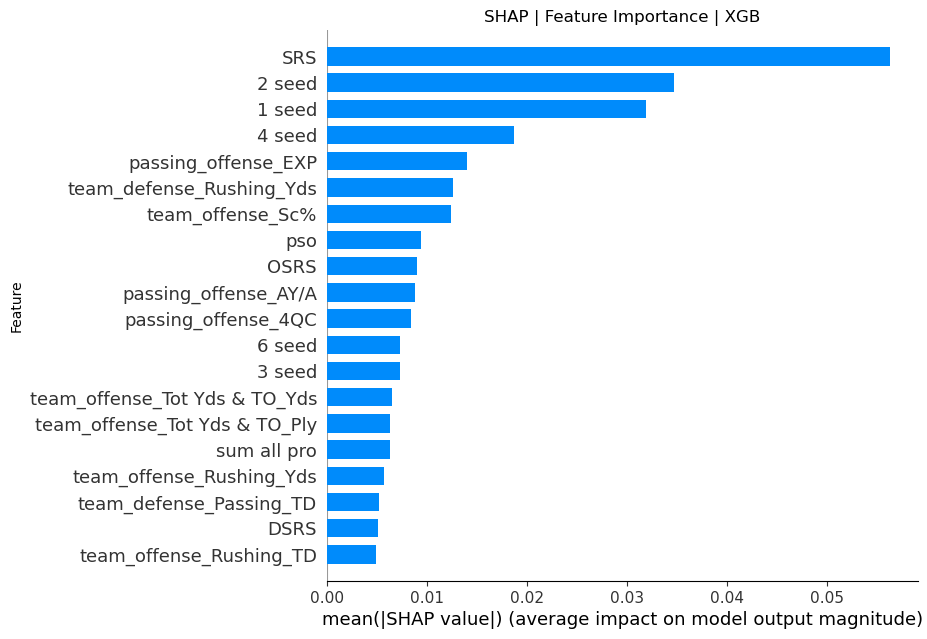

In [43]:
import shap
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
import numpy as np

explainer = shap.Explainer(xgb)
shap_values = explainer.shap_values(test[features])

shap.summary_plot(shap_values, test[features], feature_names=features, plot_type="bar", show=False)
plt.gcf().set_size_inches(10, 6)

plt.title('SHAP | Feature Importance | XGB')

plt.savefig("xg_shap_bar.png", bbox_inches='tight', pad_inches=0.1)
image = Image.open("xg_shap_bar.png")
image_with_border = ImageOps.expand(image, border=2, fill='black')
image_with_border.save("xg_shap_bar.png")

feature_importance = np.abs(shap_values).mean(axis=0)
top_features = feature_importance.argsort()[::-1]

top_features_list = [features[index] for index in top_features]
print("Top Features:")
print(top_features_list)

plt.ylabel("Feature")
plt.show()

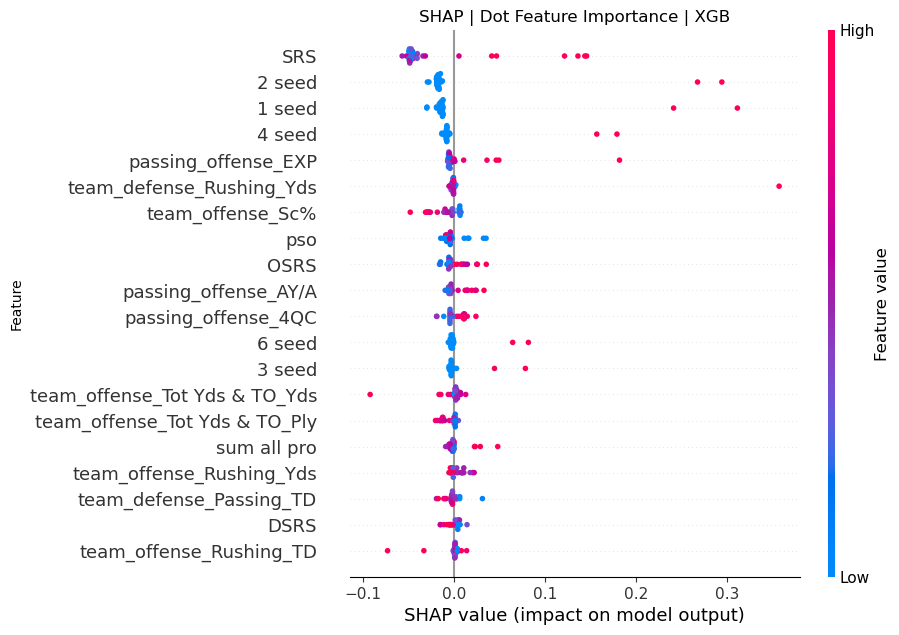

In [44]:
explainer = shap.Explainer(xgb)
shap_values = explainer.shap_values(test[features])
shap.summary_plot(shap_values, test[features], feature_names=features, show=False)
plt.gcf().set_size_inches(10, 6)

plt.title('SHAP | Dot Feature Importance | XGB')

plt.savefig("xg_shap_dot.png", bbox_inches='tight', pad_inches=0.1)
image = Image.open("xg_shap_dot.png")
image_with_border = ImageOps.expand(image, border=2, fill='black')
image_with_border.save("xg_shap_dot.png")

plt.ylabel("Feature")
plt.show()